In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
Dopp_pvals = pd.read_csv("Dopp_Pvals_sn150_2.csv", header=None)
Spot_pvals = pd.read_csv("Spot_Pvals_sn150_p.csv", header=None)

In [4]:
from scipy.stats import f

<IPython.core.display.Javascript object>


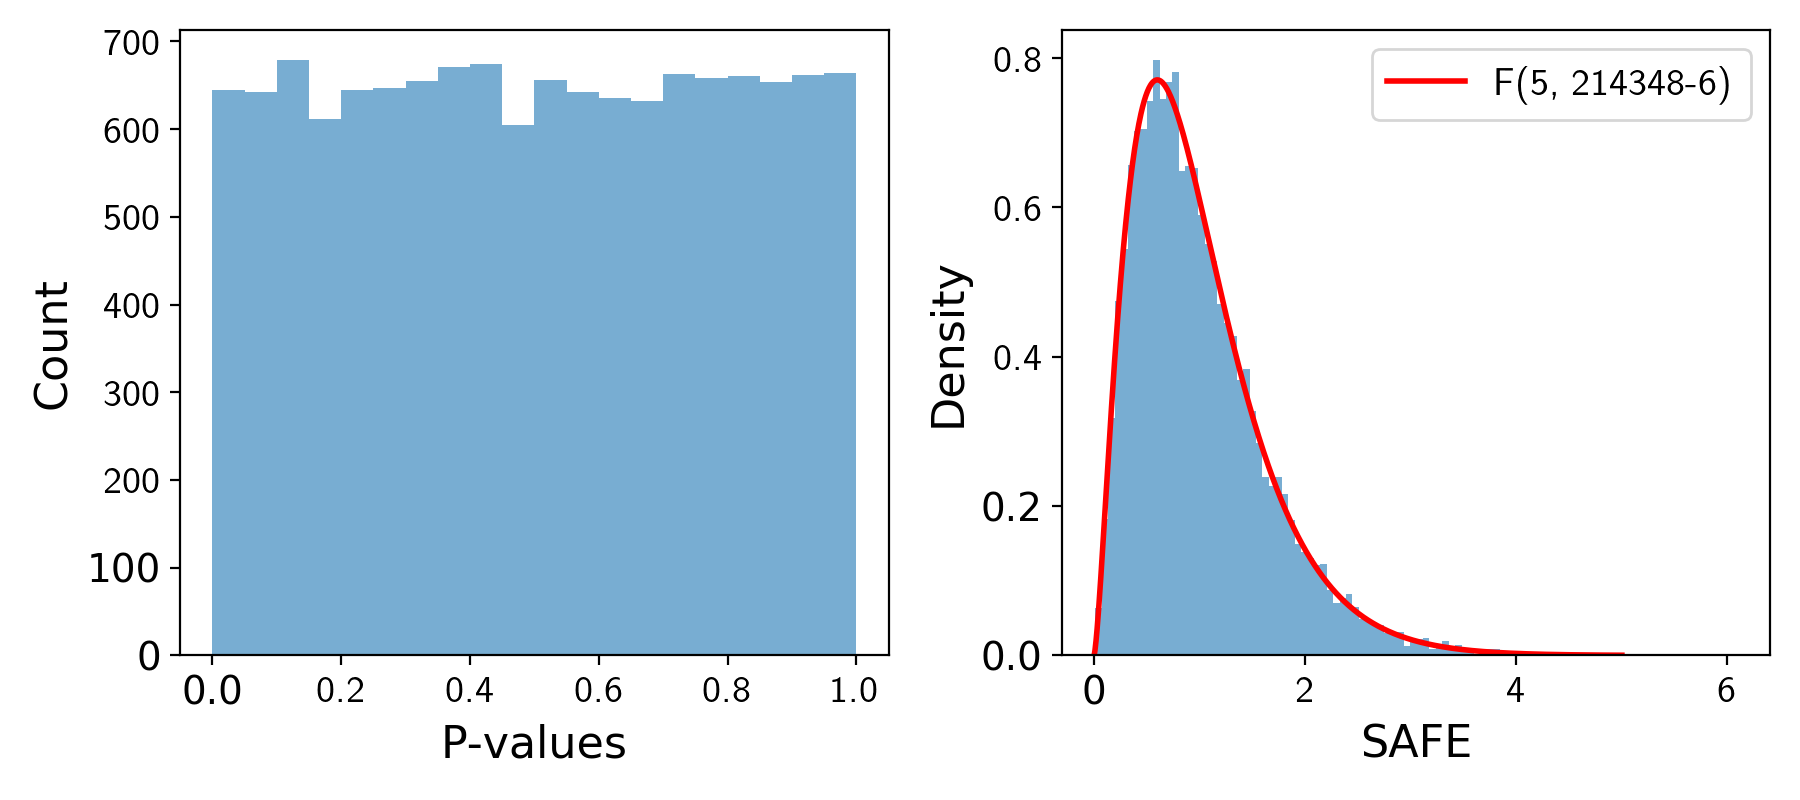

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,4))
plt.rc('text', usetex=True)
nullpvals = np.hstack(np.array([np.array(Spot_pvals)[1000:2000,t] for t in [0,1,2,3,4,5,6,19,20,21,22,23,24]]))
ax1.hist(nullpvals, bins=20, alpha=0.6)
ax1.set_xlabel("P-values", fontsize=16)
ax1.set_ylabel("Count", fontsize=16)
ax1.tick_params(axis='both', labelsize=14)

nullfstat = f.ppf(nullpvals, 5, 214348 - 6)
ax2.hist(nullfstat, bins=100, density=True, alpha=0.6)
ax2.plot(np.linspace(0,5,1000), f.pdf(np.linspace(0,5,1000), 5, 214348-6), c='r', lw=2, label='F(5, 214348-6)')
ax2.set_xlabel("SAFE", fontsize=16)
ax2.set_ylabel("Density", fontsize=16)
ax2.tick_params(axis='both', labelsize=14)
ax2.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.savefig("pvalue_nulldist.pdf", format='pdf')
plt.show()

In [7]:
falservs = pd.read_csv("SOAP_RVs.csv").RV.values

<IPython.core.display.Javascript object>


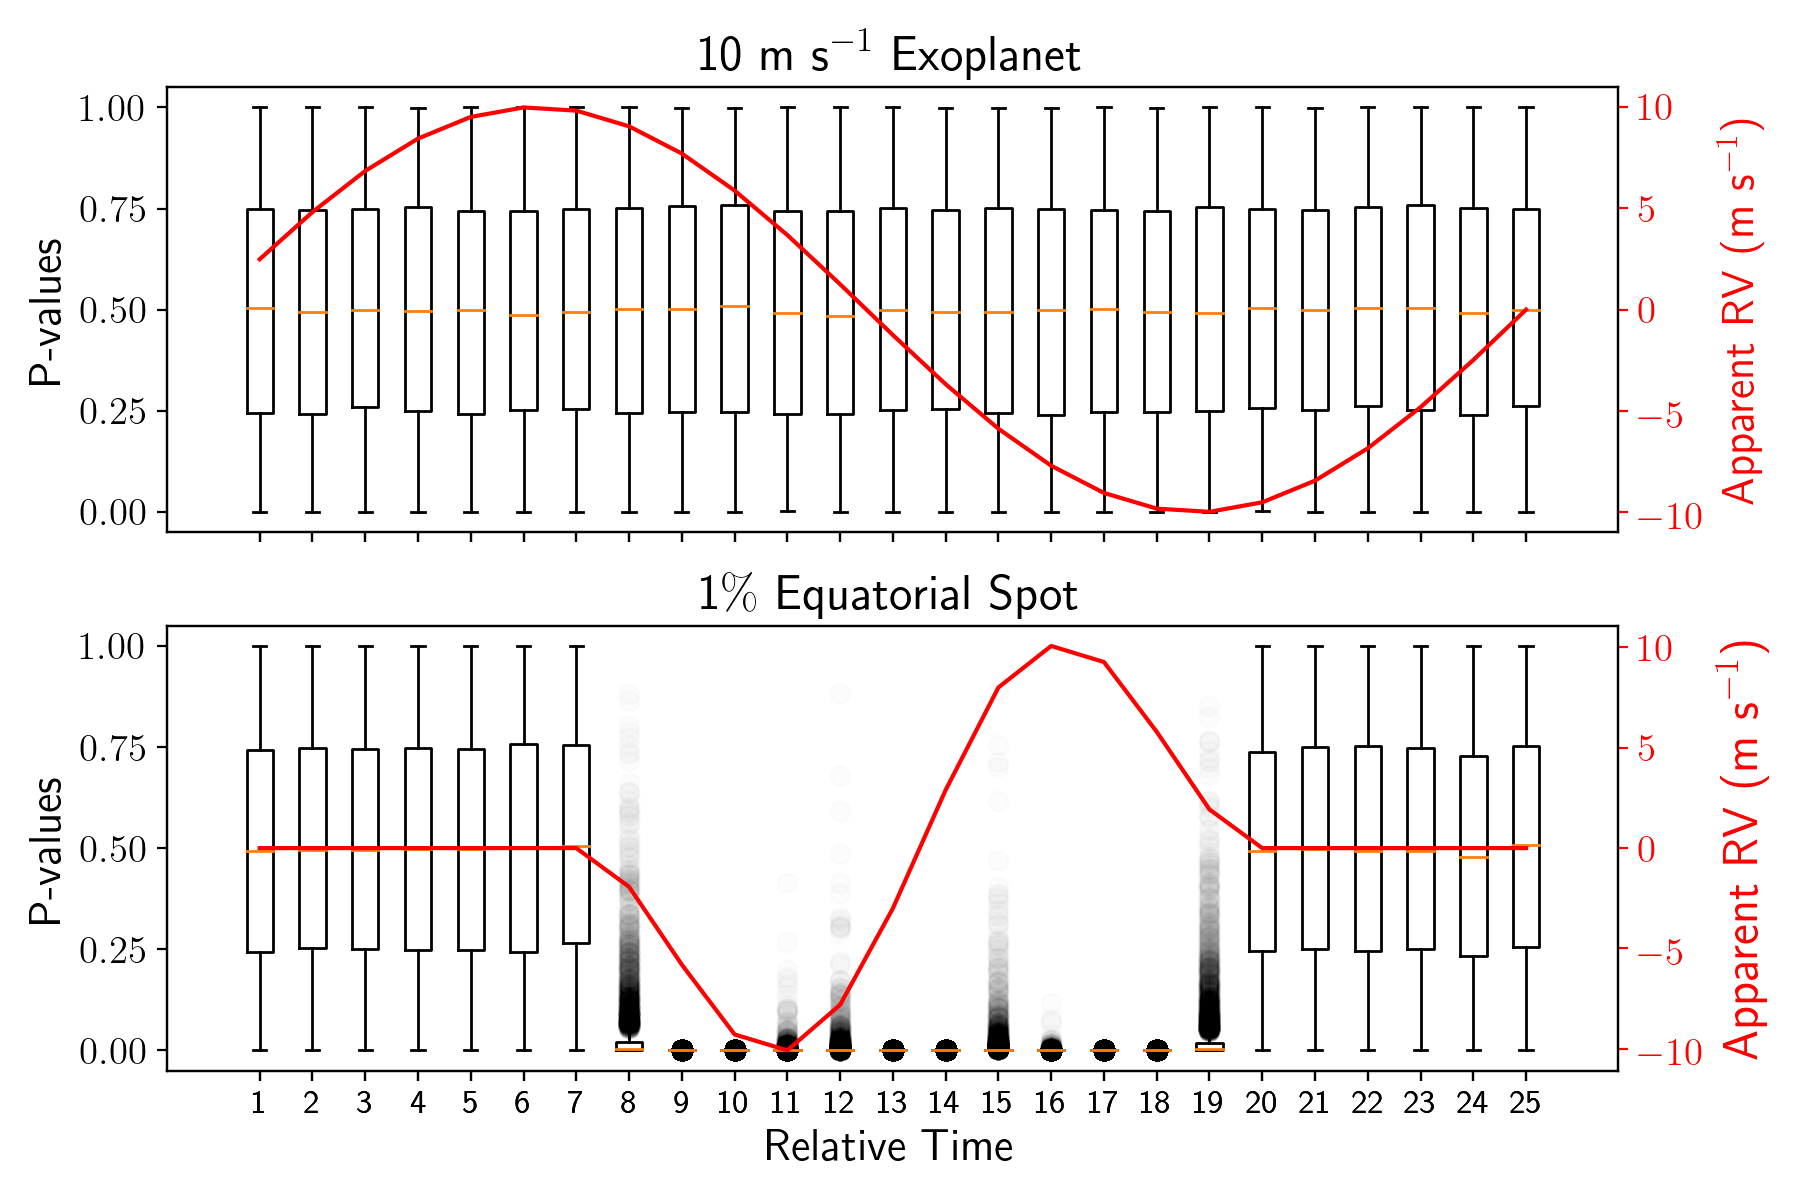

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(9,6))
plt.rc('text', usetex=True)
#ax1.set_xlabel("Relative Time", fontsize=12)
ax1.set_ylabel("P-values", fontsize=16)
ax1.tick_params(axis='y', labelsize=14)
ax1.boxplot(np.array(Dopp_pvals))
ax1.set_title(r"10 m s$^{-1}$ Exoplanet", fontsize=18)

ax1p = ax1.twinx()
ax1p.set_ylabel(r"Apparent RV (m s$^{-1}$)", fontsize=16, color='red')
ax1p.plot(np.arange(1,26), 10*np.sin(2*np.pi*np.arange(1,26)/25), color='red')
ax1p.tick_params(axis='y', labelcolor='red', color='red', labelsize=14)

bplt = ax2.boxplot(np.array(Spot_pvals))
for bp in bplt['fliers']:
    bp.set(markersize=7, markerfacecolor='k', alpha=0.01)
ax2.set_ylabel("P-values", fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.set_xlabel("Relative Time", fontsize=16)

ax2p = ax2.twinx()
ax2p.set_ylabel(r"Apparent RV (m s$^{-1}$)", fontsize=18, color='red')
ax2p.plot(np.arange(1,26), falservs, color='red')
ax2p.tick_params(axis='y', labelcolor='red', color='red', labelsize=14)
ax2p.set_title(r"1$\%$ Equatorial Spot", fontsize=18)
#ax2p.set_xticklabels([""]*25)

fig.tight_layout()

plt.savefig("exoplanet_vs_spot_simulation.pdf", format='pdf')
plt.show()